# 1. Data Understanding and Exploration

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [148]:
# reading the dataset
data = pd.read_csv("train.csv")

In [149]:
# head
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [150]:
data.shape

(1460, 81)

In [151]:
# summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [152]:
data.describe() 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [153]:
# Taking numeric data from data set
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [154]:
# Dropping the columns we want to treat as categorical variables
data_numeric = data_numeric.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                   'MoSold', 'YrSold'], axis=1)
data_numeric.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,1710,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,1262,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,1786,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,1717,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,2198,836,192,84,0,0,0,0,0,250000


Outlier Treatment

In [155]:
# Different percentiles observations
data_numeric.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,1314.100000,96.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,...,2158.300000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,1387.050000,107.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,...,2466.100000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000
99%,1445.410000,141.000000,37567.640000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,...,3123.480000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000


(1453, 81)

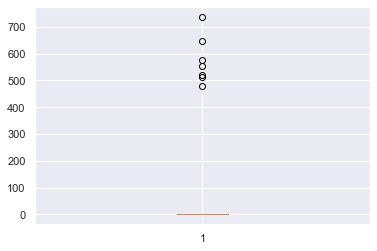

In [156]:
# outlier treatment
plt.boxplot(data['PoolArea'])
Q1 = data['PoolArea'].quantile(0.1)
Q3 = data['PoolArea'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['PoolArea'] >= Q1 - 1.5*IQR) & 
                      (data['PoolArea'] <= Q3 + 1.5*IQR)]
data.shape

(1402, 81)

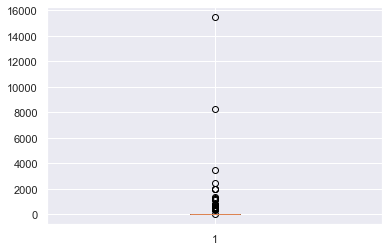

In [157]:
# outlier treatment
plt.boxplot(data['MiscVal'])
Q1 = data['MiscVal'].quantile(0.1)
Q3 = data['MiscVal'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['MiscVal'] >= Q1 - 1.5*IQR) & 
                      (data['MiscVal'] <= Q3 + 1.5*IQR)]
data.shape

(1291, 81)

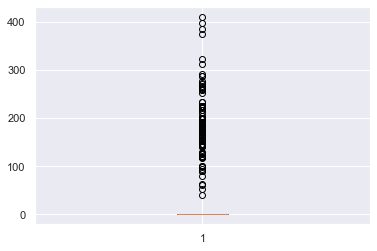

In [158]:
# outlier treatment
plt.boxplot(data['ScreenPorch'])
Q1 = data['ScreenPorch'].quantile(0.1)
Q3 = data['ScreenPorch'].quantile(0.9)
IQR = Q3 - Q1
data = data[(house['ScreenPorch'] >= Q1 - 1.5*IQR) & 
                      (data['ScreenPorch'] <= Q3 + 1.5*IQR)]
data.shape

(1274, 81)

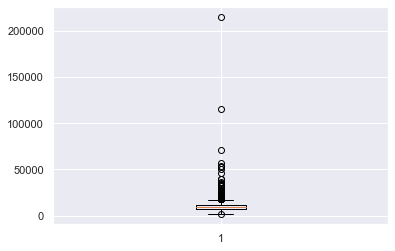

In [159]:
# outlier treatment
plt.boxplot(data['LotArea'])
Q1 = data['LotArea'].quantile(0.1)
Q3 = data['LotArea'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['LotArea'] >= Q1 - 1.5*IQR) & 
                      (data['LotArea'] <= Q3 + 1.5*IQR)]
data.shape

(1255, 81)

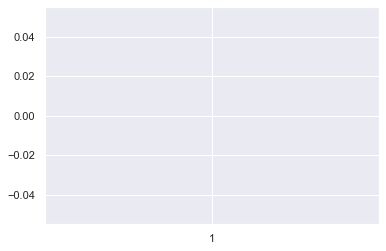

In [160]:
# outlier treatment
plt.boxplot(data['MasVnrArea'])
Q1 = data['MasVnrArea'].quantile(0.1)
Q3 = data['MasVnrArea'].quantile(0.9)
IQR = Q3 - Q1
data = data[(house['MasVnrArea'] >= Q1 - 1.5*IQR) & 
                      (data['MasVnrArea'] <= Q3 + 1.5*IQR)]
data.shape

(1253, 81)

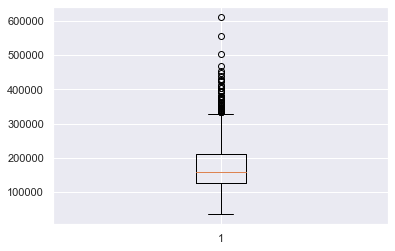

In [161]:
# outlier treatment
plt.boxplot(data['SalePrice'])
Q1 = data['SalePrice'].quantile(0.1)
Q3 = data['SalePrice'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['SalePrice'] >= Q1 - 1.5*IQR) & 
                      (data['SalePrice'] <= Q3 + 1.5*IQR)]
data.shape

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

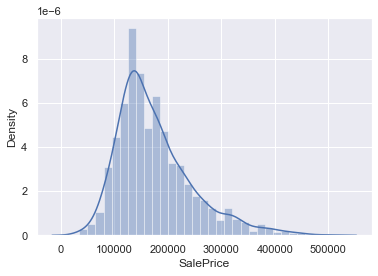

In [162]:
sns.distplot(data['SalePrice'])

By seeing above distplot since the Saleprice figures are skewed towards left, we will apply the log transformation to obtain a centralized data

Checking the Correlation between the variables

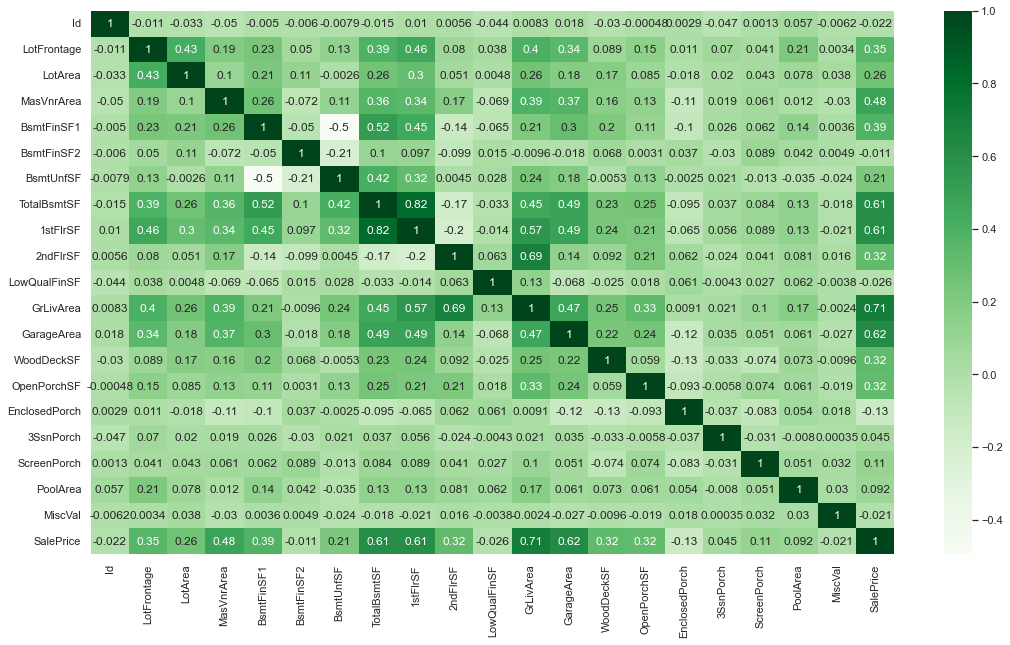

In [163]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(18,10))

# heatmap
sns.heatmap(data_numeric.corr(),cmap="Greens", annot=True)
plt.show()

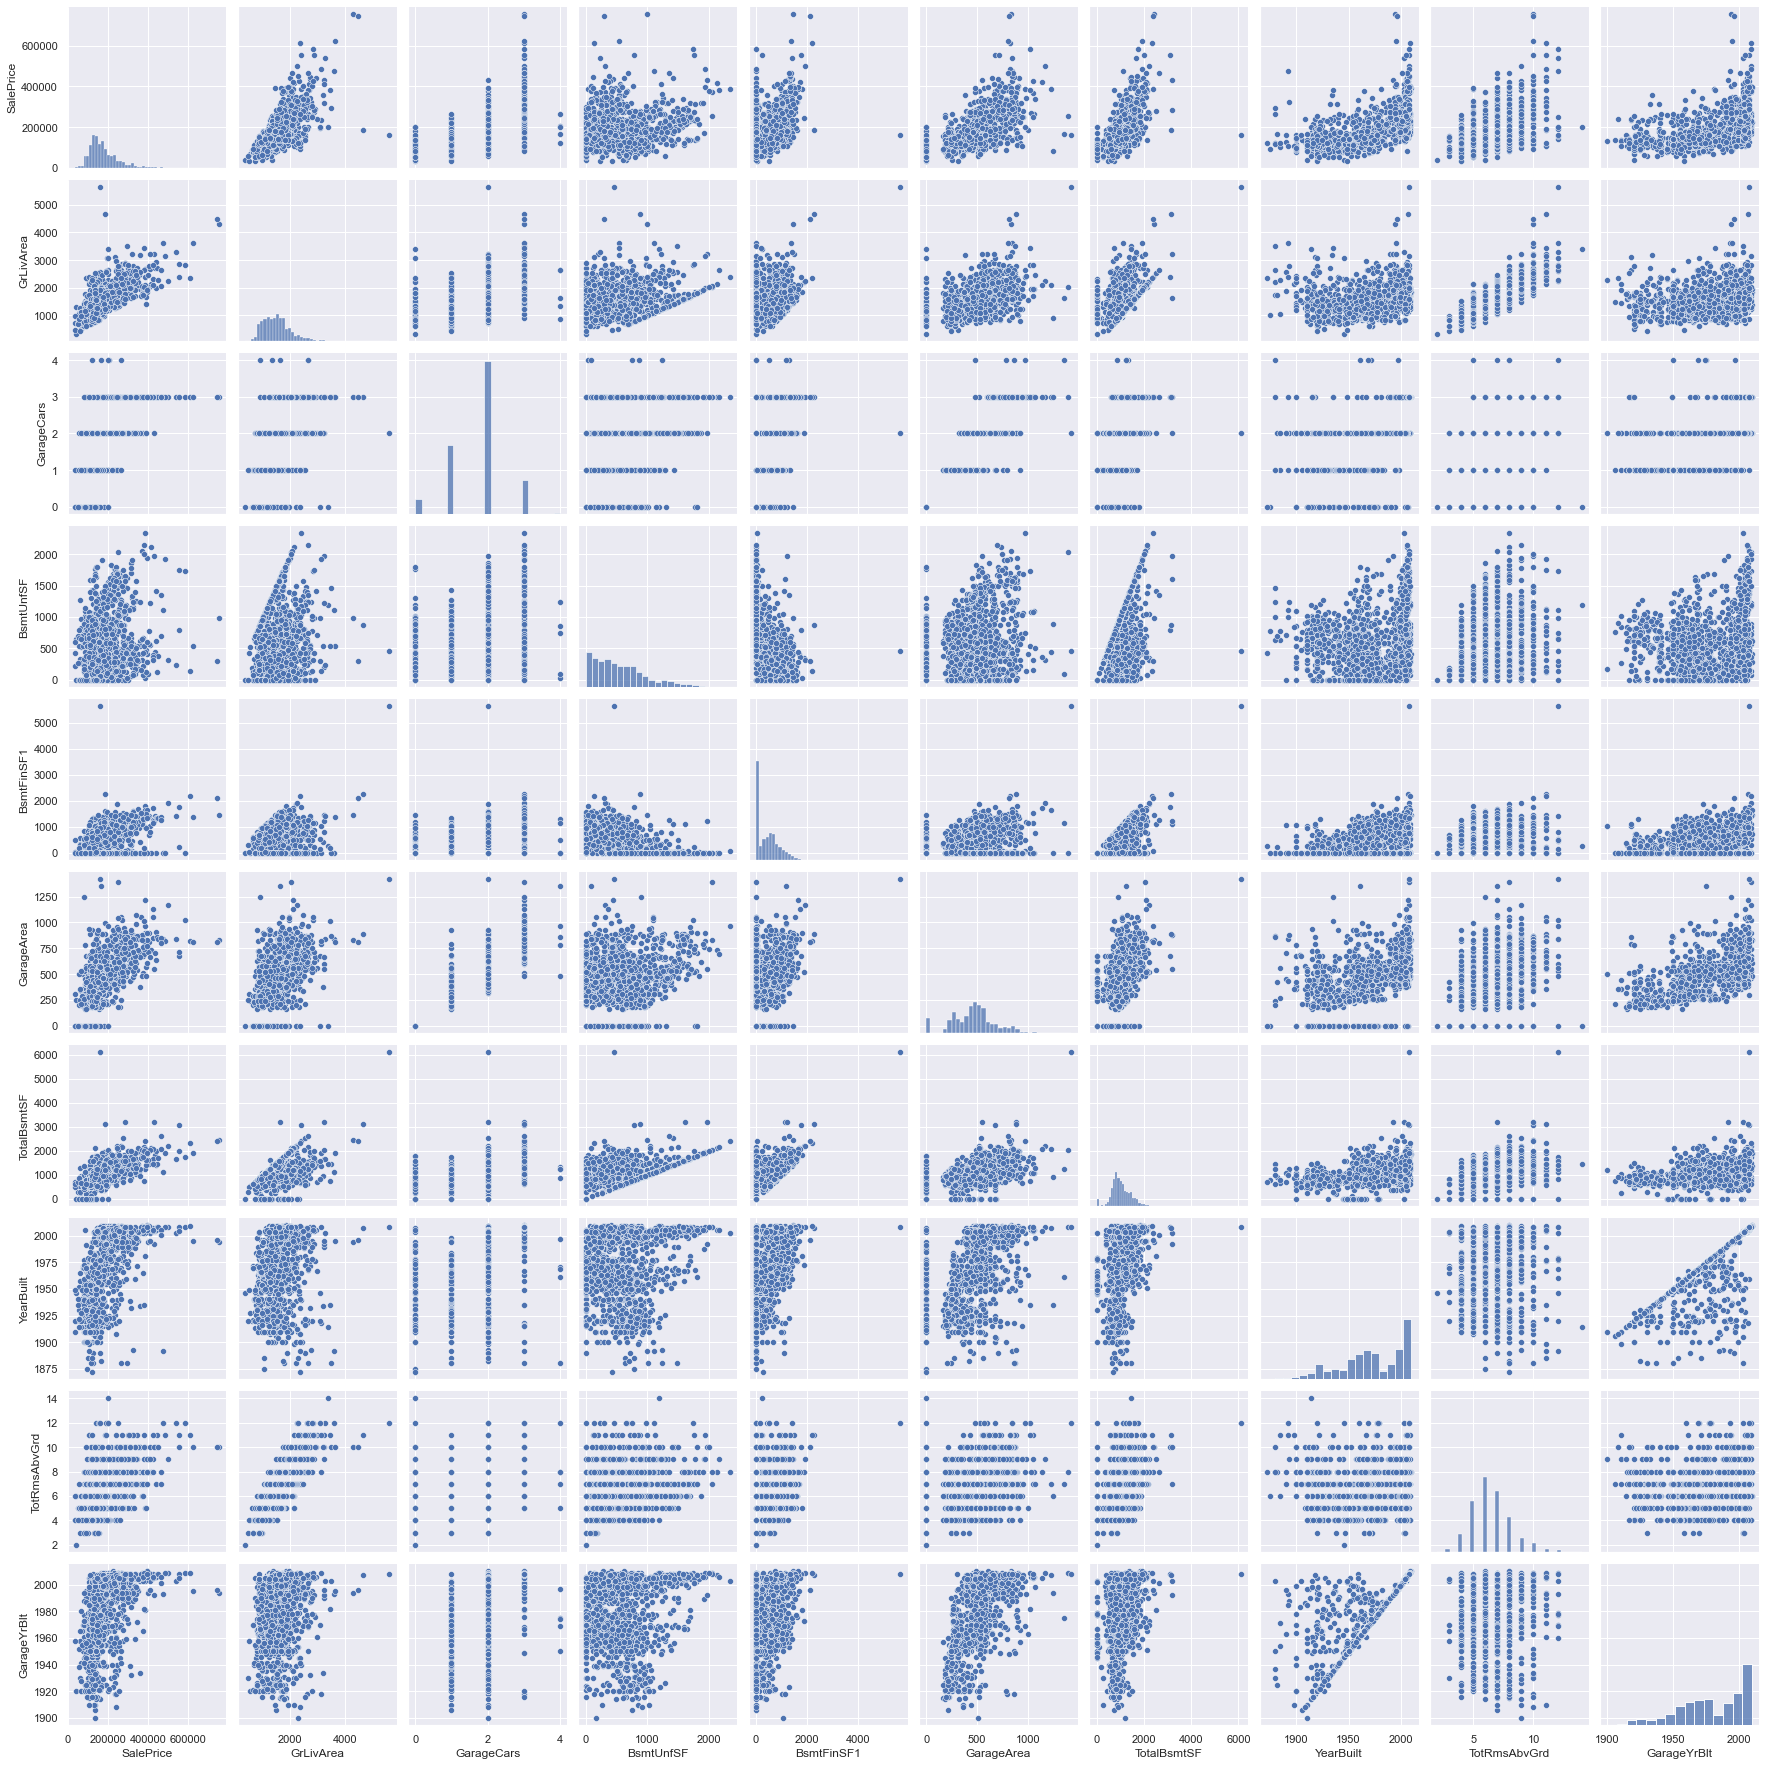

In [164]:
# Before dropping any columns, we will first check their predictive power
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(house[cols], size = 2.5)
plt.show()

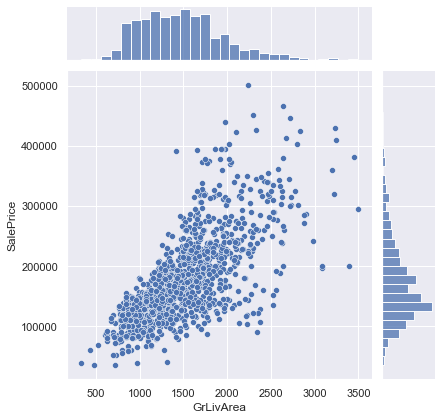

In [211]:
# Analyse some important numeric columns
sns.jointplot(x='GrLivArea', y='SalePrice', data=data)
plt.show()

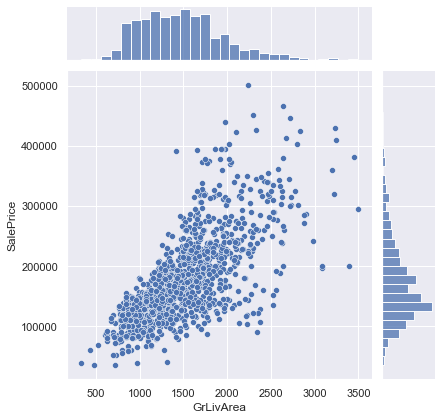

In [212]:
# Again plotting GrLivArea vs SalePrice
sns.jointplot(x = data['GrLivArea'], y = data['SalePrice'])
plt.show()

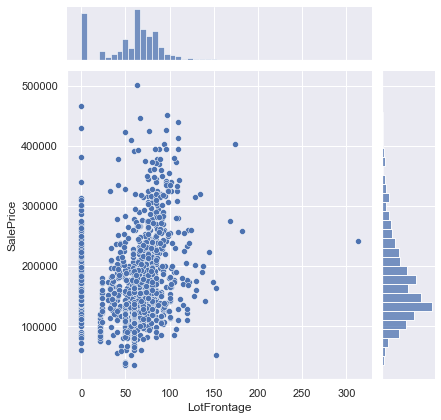

In [213]:
# Lot frontage vs SalePrice 
sns.jointplot(x = data['LotFrontage'], y = data['SalePrice'])
plt.show()

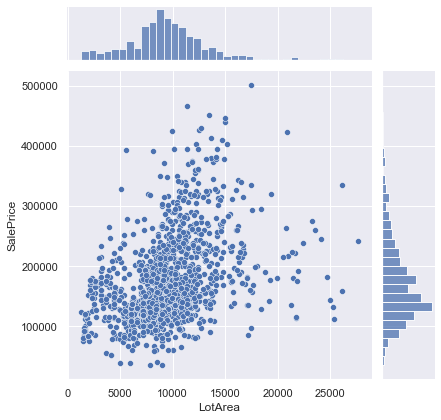

In [214]:
# LotArea vs SalePrice
sns.jointplot(x = data['LotArea'], y = data['SalePrice'])
plt.show()

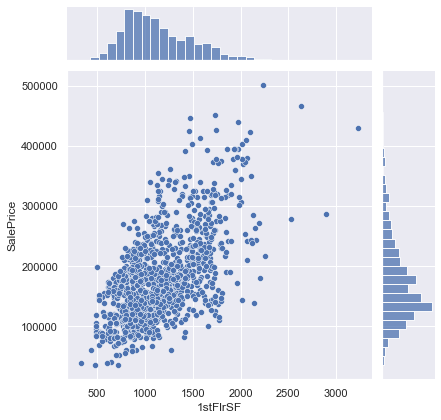

In [215]:
# 1stFlrSF vs SalePrice
sns.jointplot(x = data['1stFlrSF'], y = data['SalePrice'])
plt.show()

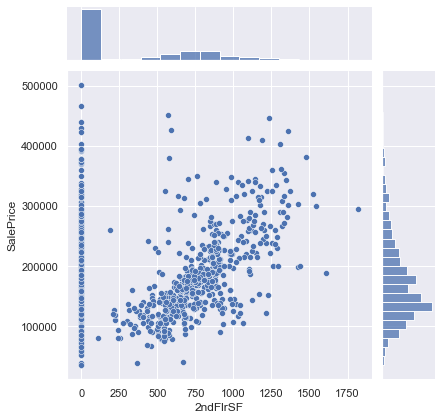

In [216]:
# 2ndFlrSF vs SalePrice
sns.jointplot(x = data['2ndFlrSF'], y = data['SalePrice'])
plt.show()

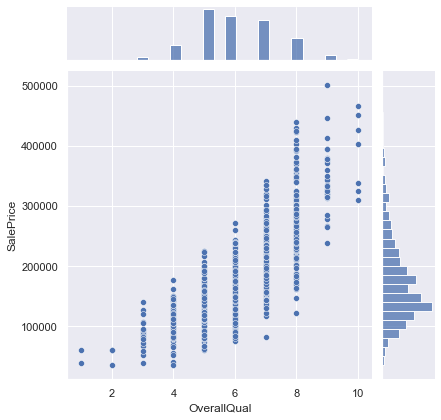

In [217]:
# OverallQual vs SalePrice
sns.jointplot(x = data['OverallQual'], y = data['SalePrice'])
plt.show()

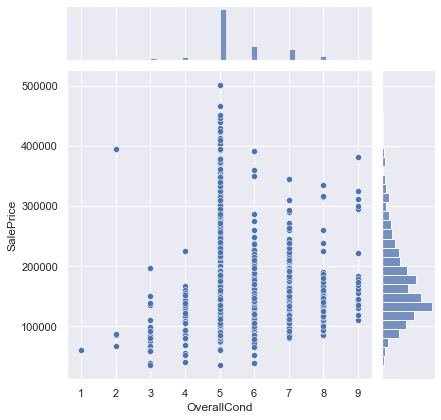

In [218]:
# OverallCond vs SalePrice
sns.jointplot(x=data['OverallCond'], y = data['SalePrice'])
plt.show()

# 2. Data Cleaning

In [165]:
# checking variable formats
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1253 non-null   int64  
 1   MSSubClass     1253 non-null   int64  
 2   MSZoning       1253 non-null   object 
 3   LotFrontage    1040 non-null   float64
 4   LotArea        1253 non-null   int64  
 5   Street         1253 non-null   object 
 6   Alley          82 non-null     object 
 7   LotShape       1253 non-null   object 
 8   LandContour    1253 non-null   object 
 9   Utilities      1253 non-null   object 
 10  LotConfig      1253 non-null   object 
 11  LandSlope      1253 non-null   object 
 12  Neighborhood   1253 non-null   object 
 13  Condition1     1253 non-null   object 
 14  Condition2     1253 non-null   object 
 15  BldgType       1253 non-null   object 
 16  HouseStyle     1253 non-null   object 
 17  OverallQual    1253 non-null   int64  
 18  OverallC

In [166]:
#checking the number of null values in the dataset
data.isnull().sum()  

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      213
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [167]:
# Checking the percentage of missing values
round(100*(data.isnull().sum()/len(house.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      14.59
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

Null value treatment

In [168]:
data.shape

(1253, 81)

In [169]:
#NA in Alley column means No Alley, so we will replace NA by it.
data['Alley'].fillna('No Alley', inplace=True)
data['MasVnrType'].fillna('None', inplace=True) 
#NA in FireplaceQu column means No Fireplace, so we will replace NA by it.
data['FireplaceQu'].fillna('No Fireplace', inplace=True)
#NA in PoolQC column means No Pool, so we will replace NA by it.
data['PoolQC'].fillna('No Pool', inplace=True) 
#NA in Fence column means No Fence, so we will replace NA by it.
data['Fence'].fillna('No Fence', inplace=True) 
data['MasVnrArea'].fillna(0, inplace=True) 
data['LotFrontage'].fillna(0, inplace=True) 

In [170]:
#NA in GarageType, GarageFinish, GarageQual, GarageCond columns mean No Garage, so we will replace NA by it.

data['GarageType'].fillna('No Garage', inplace=True) 
data['GarageFinish'].fillna('No Garage', inplace=True) 
data['GarageQual'].fillna('No Garage', inplace=True) 
data['GarageCond'].fillna('No Garage', inplace=True) 

In [171]:
# MiscFeature column has almost 99% null values so we will drop it
house= data.drop('MiscFeature', axis=1)

In [172]:
house.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [173]:
#converting year to number of years
data['YearBuilt'] = 2019 - data['YearBuilt']
data['YearRemodAdd'] = 2019 - data['YearRemodAdd']
data['GarageYrBlt'] = 2019 - data['GarageYrBlt']
data['YrSold'] = 2019 - data['YrSold']

In [174]:
#converting from int type to object to treat the variables as categorical variables
data['MSSubClass'] = data['MSSubClass'].astype('object')
data['OverallQual'] = data['OverallQual'].astype('object')
data['OverallCond'] = data['OverallCond'].astype('object')
data['BsmtFullBath'] = data['BsmtFullBath'].astype('object')
data['BsmtHalfBath'] = data['BsmtHalfBath'].astype('object')
data['FullBath'] = data['FullBath'].astype('object')
data['HalfBath'] = data['HalfBath'].astype('object')
data['BedroomAbvGr'] = data['BedroomAbvGr'].astype('object')
data['KitchenAbvGr'] = data['KitchenAbvGr'].astype('object')
data['TotRmsAbvGrd'] = data['TotRmsAbvGrd'].astype('object')
data['Fireplaces'] = data['Fireplaces'].astype('object')
data['GarageCars'] = data['GarageCars'].astype('object')

In [175]:
data.shape

(1253, 81)

In [176]:
final = data

Dummy Variables

In [177]:
# List of variables to map

varlist1 =  ['Street']

def binary_map(x):
    return x.map({'Pave': 1, "Grvl": 0})


final[varlist1] = final[varlist1].apply(binary_map)
# List of variables to map

varlist2 =  ['Utilities']

def binary_map(x):
    return x.map({'AllPub': 1, "NoSeWa": 0})

# Applying the function to the Lead list
final[varlist2] = final[varlist2].apply(binary_map)

In [178]:
# List of variables to map

varlist3 =  ['CentralAir']

# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the Lead list
final[varlist3] = final[varlist3].apply(binary_map)

# 3. Data Preparation

In [179]:
# split into X and y
X = final.drop([ 'Id'], axis=1)

In [180]:
# Creating Dummy columns to convert categorical into numerical
data_categorical = X.select_dtypes(include=['object'])
data_dummies = pd.get_dummies(data_categorical, drop_first=True)
data_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [181]:
# drop categorical variables 
final = final.drop(list(data_categorical.columns), axis=1)

In [182]:
# concat dummy variables with X
final = pd.concat([final, data_dummies], axis=1)

In [183]:
final.shape

(1253, 301)

In [184]:
# taking out the target variable
X = final.head(1253)
y = np.log(X.SalePrice)
X = X.drop("SalePrice",1) 

In [185]:
X = X.fillna(X.interpolate())

In [186]:
X.shape

(1253, 300)

In [187]:
# scaling the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [188]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

# 4. Model Building and Evaluation

##### Ridge Regression

In [190]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [191]:
#checking the value of optimum number of parameters and best score
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 4.0}
-0.0749165359037116


In [192]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.026845,0.004340,0.007510,0.006160,0.0001,{'alpha': 0.0001},-0.106727,-0.120373,-0.088955,-0.085297,...,-0.095732,0.015636,27,-0.045555,-0.047581,-0.048824,-0.046947,-0.051939,-0.048169,0.002159
1,0.029101,0.004195,0.006255,0.007735,0.001,{'alpha': 0.001},-0.106180,-0.119687,-0.088819,-0.085815,...,-0.095359,0.015532,26,-0.045587,-0.047616,-0.048833,-0.046984,-0.051996,-0.048203,0.002166
2,0.030239,0.007217,0.009992,0.001783,0.01,{'alpha': 0.01},-0.102229,-0.115574,-0.087969,-0.087452,...,-0.093174,0.014595,24,-0.046033,-0.047798,-0.048927,-0.047226,-0.052419,-0.048480,0.002179
3,0.028305,0.003363,0.009929,0.000322,0.05,{'alpha': 0.05},-0.095800,-0.103142,-0.086814,-0.087045,...,-0.088497,0.011196,23,-0.047220,-0.048261,-0.049303,-0.047800,-0.053227,-0.049162,0.002144
4,0.030035,0.001550,0.012805,0.003747,0.1,{'alpha': 0.1},-0.093702,-0.095667,-0.086139,-0.086070,...,-0.085850,0.009885,21,-0.047898,-0.048818,-0.049649,-0.048280,-0.053811,-0.049691,0.002142
5,0.029685,0.003782,0.012502,0.003900,0.2,{'alpha': 0.2},-0.091460,-0.088743,-0.085250,-0.084637,...,-0.083128,0.009129,19,-0.048644,-0.049741,-0.050156,-0.048973,-0.054556,-0.050414,0.002140
6,0.030575,0.002090,0.010984,0.001465,0.3,{'alpha': 0.3},-0.089822,-0.085440,-0.084586,-0.083630,...,-0.081603,0.008791,18,-0.049107,-0.050395,-0.050505,-0.049507,-0.055017,-0.050906,0.002122
7,0.031642,0.002109,0.010184,0.002075,0.4,{'alpha': 0.4},-0.088547,-0.083469,-0.084028,-0.082984,...,-0.080552,0.008641,17,-0.049502,-0.050864,-0.050777,-0.049929,-0.055367,-0.051288,0.002103
8,0.033115,0.002729,0.012492,0.001481,0.5,{'alpha': 0.5},-0.087517,-0.082072,-0.083553,-0.082445,...,-0.079745,0.008525,16,-0.049864,-0.051233,-0.051022,-0.050277,-0.055650,-0.051609,0.002080
9,0.029353,0.001111,0.011882,0.001062,0.6,{'alpha': 0.6},-0.086653,-0.080999,-0.083137,-0.081975,...,-0.079105,0.008393,15,-0.050188,-0.051550,-0.051224,-0.050574,-0.055876,-0.051882,0.002053


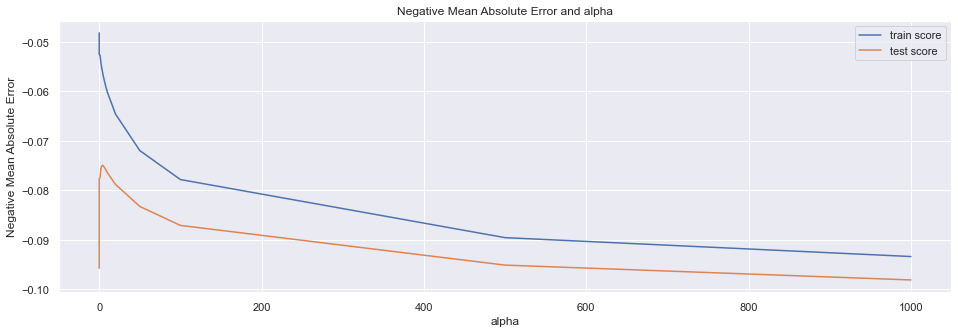

In [193]:
# plotting mean test and train scores along with lambda
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

From the above graph we can see the bestparam score we have achieved as optimum lambda equal to 4

In [194]:
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.08897752e-05, -1.29682771e-04,  8.64761399e-06, -2.08411088e-02,
        0.00000000e+00, -2.80952639e-03, -1.17470290e-03,  2.13805010e-05,
        5.95509569e-05,  6.69235557e-05, -2.28578523e-05,  1.03616659e-04,
        3.78073071e-02,  7.71807667e-05,  1.14935666e-04, -8.41148566e-06,
        1.83704953e-04,  5.27480087e-04,  1.35762191e-04,  1.18467090e-04,
        2.23992882e-04,  1.19151079e-04,  2.24204962e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.07244568e-04,  3.11493082e-04,
       -1.15013570e-02,  9.10543771e-03,  2.20165915e-02,  5.60197285e-03,
       -3.99549979e-02,  4.85501353e-02,  2.26949488e-02, -2.19576652e-02,
       -1.55906795e-02, -1.71868047e-02,  2.21609886e-02, -6.66735590e-02,
       -1.65215939e-02,  5.31335754e-03,  6.97198715e-02,  1.15167499e-02,
        2.88690951e-02,  3.31723761e-03,  2.09061191e-02,  3.67559452e-02,
       -1.14889114e-02, -4.86489055e-02,  5.38685411e-03,  1.61762364e-02,
       -2.83527853e-02,  

In [195]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.204),
 ('Id', -0.0),
 ('LotFrontage', -0.0),
 ('LotArea', 0.0),
 ('Street', -0.021),
 ('Utilities', 0.0),
 ('YearBuilt', -0.003),
 ('YearRemodAdd', -0.001),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.0),
 ('CentralAir', 0.038),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.0),
 ('GarageYrBlt', 0.001),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('MoSold', -0.0),
 ('YrSold', 0.0),
 ('MSSubClass_30', -0.012),
 ('MSSubClass_40', 0.009),
 ('MSSubClass_45', 0.022),
 ('MSSubClass_50', 0.006),
 ('MSSubClass_60', -0.04),
 ('MSSubClass_70', 0.049),
 ('MSSubClass_75', 0.023),
 ('MSSubClass_80', -0.022),
 ('MSSubClass_85', -0.016),
 ('MSSubClass_90', -0.017),
 ('MSSubClass_120', 0.022),
 ('MSSubClass_160', -0.067),
 ('MSSubClass_180', -0.017),
 ('MSSub

In [196]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.954361667432302
0.8860536242746129


In [197]:
#Let us see now the RMSE value
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.01931356386856809


##### Lasso regresion

In [198]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [199]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.282427,0.087058,0.013908,0.003311,0.0001,{'alpha': 0.0001},-0.084353,-0.075399,-0.080517,-0.080684,...,-0.076353,0.008276,1,-0.051724,-0.052959,-0.052804,-0.052213,-0.057217,-0.053384,0.001967
1,0.050501,0.005771,0.013959,0.003333,0.001,{'alpha': 0.001},-0.083513,-0.082241,-0.086239,-0.081683,...,-0.080028,0.006962,2,-0.066716,-0.067696,-0.065153,-0.068256,-0.070302,-0.067624,0.001703
2,0.036513,0.004352,0.011031,0.000946,0.01,{'alpha': 0.01},-0.102980,-0.103797,-0.107636,-0.104642,...,-0.101069,0.007555,3,-0.096992,-0.096701,-0.095088,-0.097794,-0.101147,-0.097544,0.002004
3,0.114017,0.010693,0.011977,0.001554,0.05,{'alpha': 0.05},-0.104493,-0.107558,-0.110196,-0.107669,...,-0.103796,0.007584,6,-0.100418,-0.099105,-0.097898,-0.100149,-0.104158,-0.100346,0.002103
4,0.084441,0.008945,0.008537,0.007676,0.1,{'alpha': 0.1},-0.103231,-0.107880,-0.110775,-0.107862,...,-0.103777,0.007708,5,-0.100783,-0.099208,-0.098105,-0.100243,-0.104449,-0.100558,0.002151
5,0.080119,0.014898,0.010226,0.002627,0.2,{'alpha': 0.2},-0.101457,-0.108667,-0.111706,-0.108050,...,-0.103747,0.008161,4,-0.100996,-0.099659,-0.098514,-0.100403,-0.104728,-0.100860,0.002104
6,0.074649,0.015660,0.012141,0.001735,0.3,{'alpha': 0.3},-0.101585,-0.109304,-0.112625,-0.108288,...,-0.104210,0.008296,7,-0.101680,-0.100168,-0.099262,-0.100870,-0.105325,-0.101461,0.002090
7,0.052475,0.007143,0.012553,0.002521,0.4,{'alpha': 0.4},-0.102175,-0.109999,-0.113650,-0.108569,...,-0.104880,0.008310,8,-0.102411,-0.100861,-0.100096,-0.101605,-0.106033,-0.102201,0.002065
8,0.054194,0.003691,0.009217,0.001237,0.5,{'alpha': 0.5},-0.102913,-0.110751,-0.114802,-0.108578,...,-0.105640,0.008197,9,-0.103283,-0.101746,-0.101224,-0.102399,-0.106904,-0.103111,0.002017
9,0.049126,0.005836,0.011150,0.003556,0.6,{'alpha': 0.6},-0.103793,-0.111564,-0.116410,-0.108536,...,-0.106579,0.008109,10,-0.104246,-0.102732,-0.102433,-0.103304,-0.107883,-0.104120,0.001981


In [200]:
# R-squared value of the lasso model
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv1.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [201]:
# cv results
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.274765,0.080334,0.011486,0.007056,0.0001,{'alpha': 0.0001},0.908154,0.898177,0.918740,0.895581,...,0.913169,0.017978,1,0.963687,0.963599,0.959523,0.963947,0.957308,0.961613,0.002705
1,0.051367,0.001589,0.017391,0.004867,0.001,{'alpha': 0.001},0.915172,0.896825,0.905315,0.905100,...,0.911172,0.012564,2,0.937314,0.940184,0.936955,0.938496,0.935029,0.937595,0.001708
2,0.032330,0.001809,0.010725,0.000785,0.01,{'alpha': 0.01},0.879692,0.835426,0.860768,0.833447,...,0.855782,0.018439,3,0.862387,0.870386,0.865896,0.871295,0.865295,0.867052,0.003326
3,0.115720,0.013728,0.011395,0.004370,0.05,{'alpha': 0.05},0.875506,0.823165,0.852224,0.826389,...,0.847096,0.019790,5,0.850681,0.863089,0.856738,0.863398,0.856413,0.858064,0.004748
4,0.090745,0.010372,0.011565,0.004461,0.1,{'alpha': 0.1},0.877591,0.822462,0.850550,0.827330,...,0.847178,0.020285,4,0.849466,0.862733,0.856138,0.862251,0.855419,0.857201,0.004904
5,0.077590,0.016609,0.013545,0.002364,0.2,{'alpha': 0.2},0.880167,0.819668,0.847828,0.827947,...,0.846560,0.021511,6,0.847928,0.861685,0.854926,0.861120,0.854380,0.856008,0.005049
6,0.069747,0.017985,0.012665,0.003461,0.3,{'alpha': 0.3},0.880831,0.816835,0.844628,0.828054,...,0.845246,0.022282,7,0.845629,0.860273,0.853090,0.859441,0.852844,0.854255,0.005308
7,0.057902,0.009613,0.011884,0.004247,0.4,{'alpha': 0.4},0.880534,0.813327,0.840908,0.827537,...,0.843242,0.023028,8,0.843439,0.858297,0.850926,0.857340,0.850953,0.852191,0.005358
8,0.052998,0.008994,0.011832,0.006162,0.5,{'alpha': 0.5},0.879737,0.809349,0.836593,0.827574,...,0.840889,0.023689,9,0.840714,0.855864,0.848171,0.855321,0.848542,0.849722,0.005550
9,0.049333,0.006550,0.012298,0.002332,0.6,{'alpha': 0.6},0.878517,0.805988,0.831923,0.827807,...,0.838398,0.024090,10,0.837541,0.853587,0.845060,0.853122,0.845590,0.846980,0.005934


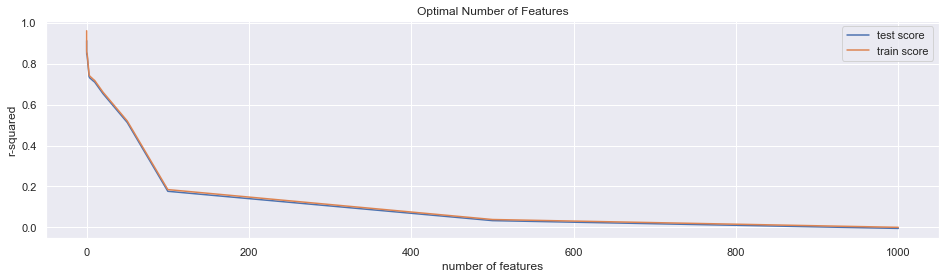

In [202]:
# plotting cv results
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [203]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0001}
-0.0763529877601665


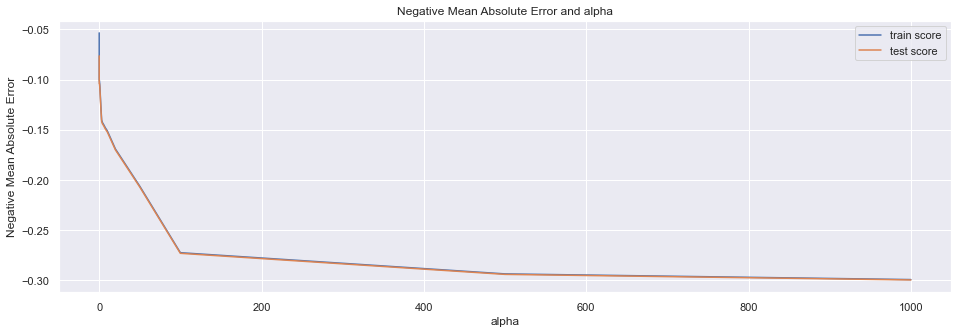

In [206]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [207]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [210]:
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.167),
 ('Id', -0.0),
 ('LotFrontage', -0.0),
 ('LotArea', 0.0),
 ('Street', -0.019),
 ('Utilities', 0.0),
 ('YearBuilt', -0.003),
 ('YearRemodAdd', -0.001),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('CentralAir', 0.028),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('GarageYrBlt', 0.0),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('MoSold', -0.0),
 ('YrSold', 0.001),
 ('MSSubClass_30', -0.005),
 ('MSSubClass_40', 0.0),
 ('MSSubClass_45', 0.018),
 ('MSSubClass_50', 0.001),
 ('MSSubClass_60', -0.065),
 ('MSSubClass_70', 0.021),
 ('MSSubClass_75', 0.0),
 ('MSSubClass_80', -0.034),
 ('MSSubClass_85', -0.017),
 ('MSSubClass_90', -0.032),
 ('MSSubClass_120', 0.0),
 ('MSSubClass_160', -0.122),
 ('MSSubClass_180', -0.028),
 ('MSSubClass_1

In [208]:
# R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9575119031855726
0.8818744660675768


In [209]:
# RMSE value 
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.02002191846461917


In [221]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [248]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head(10)

,Variable,Coeff
0,constant,11.167
1,Id,-0.000
2,LotFrontage,-0.000
3,LotArea,0.000
4,Street,-0.019
5,Utilities,0.000
6,YearBuilt,-0.003
7,YearRemodAdd,-0.001
8,MasVnrArea,0.000
9,BsmtFinSF1,0.000


In [233]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para.head(15)

In [246]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred=pred.head(16)

In [247]:
### Assign the Features as x1, x2.....

pred.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14','x15']), inplace = True) 
pred

,Variable,Coeff
C,constant,11.167
x1,OverallQual_10,0.178
x2,OverallQual_9,0.165
x3,OverallCond_9,0.134
x4,BsmtFullBath_2,0.121
x5,Neighborhood_StoneBr,0.119
x6,Neighborhood_Crawfor,0.116
x7,FullBath_3,0.116
x8,SaleType_Oth,0.111
x9,RoofMatl_Tar&Grv,0.106


## Final observations:

In [ ]:
Now doing the comparsion between the Ridge and Lasso based on the model performance.Ridge Regression was better in terms of R2 values of Train and Test,
But it is better to use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choose
the predictive variables.
It is always advisable to use simple and robust model.

In [ ]:
#Equation can be formulated using the features and coefficients obtained by Lasso
Log(Y) = 11.167 + 0.178(x1) + 0.165(x2) + 0.134(x3) + 0.121(x4) + 0.119(x5) + 0.116(x6) + 0.116(x7) + 0.111(x8) + 0.106(x9) + 0.101(x10)+0.085(x11)+0.088(x12)+0.087(x13)+0.086(x14)+0.086(x15) + Error term(RSS + alpha *(sum of absolute value of coefficients)